In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()
# model = keras.models.load_model('models/mobilenet_1_0_224_tf.h5')

17227776/17225924 [==============================] - 3s 0us/step


In [6]:
def prepare_image(file):
    img_path = 'data/mobilenet_samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

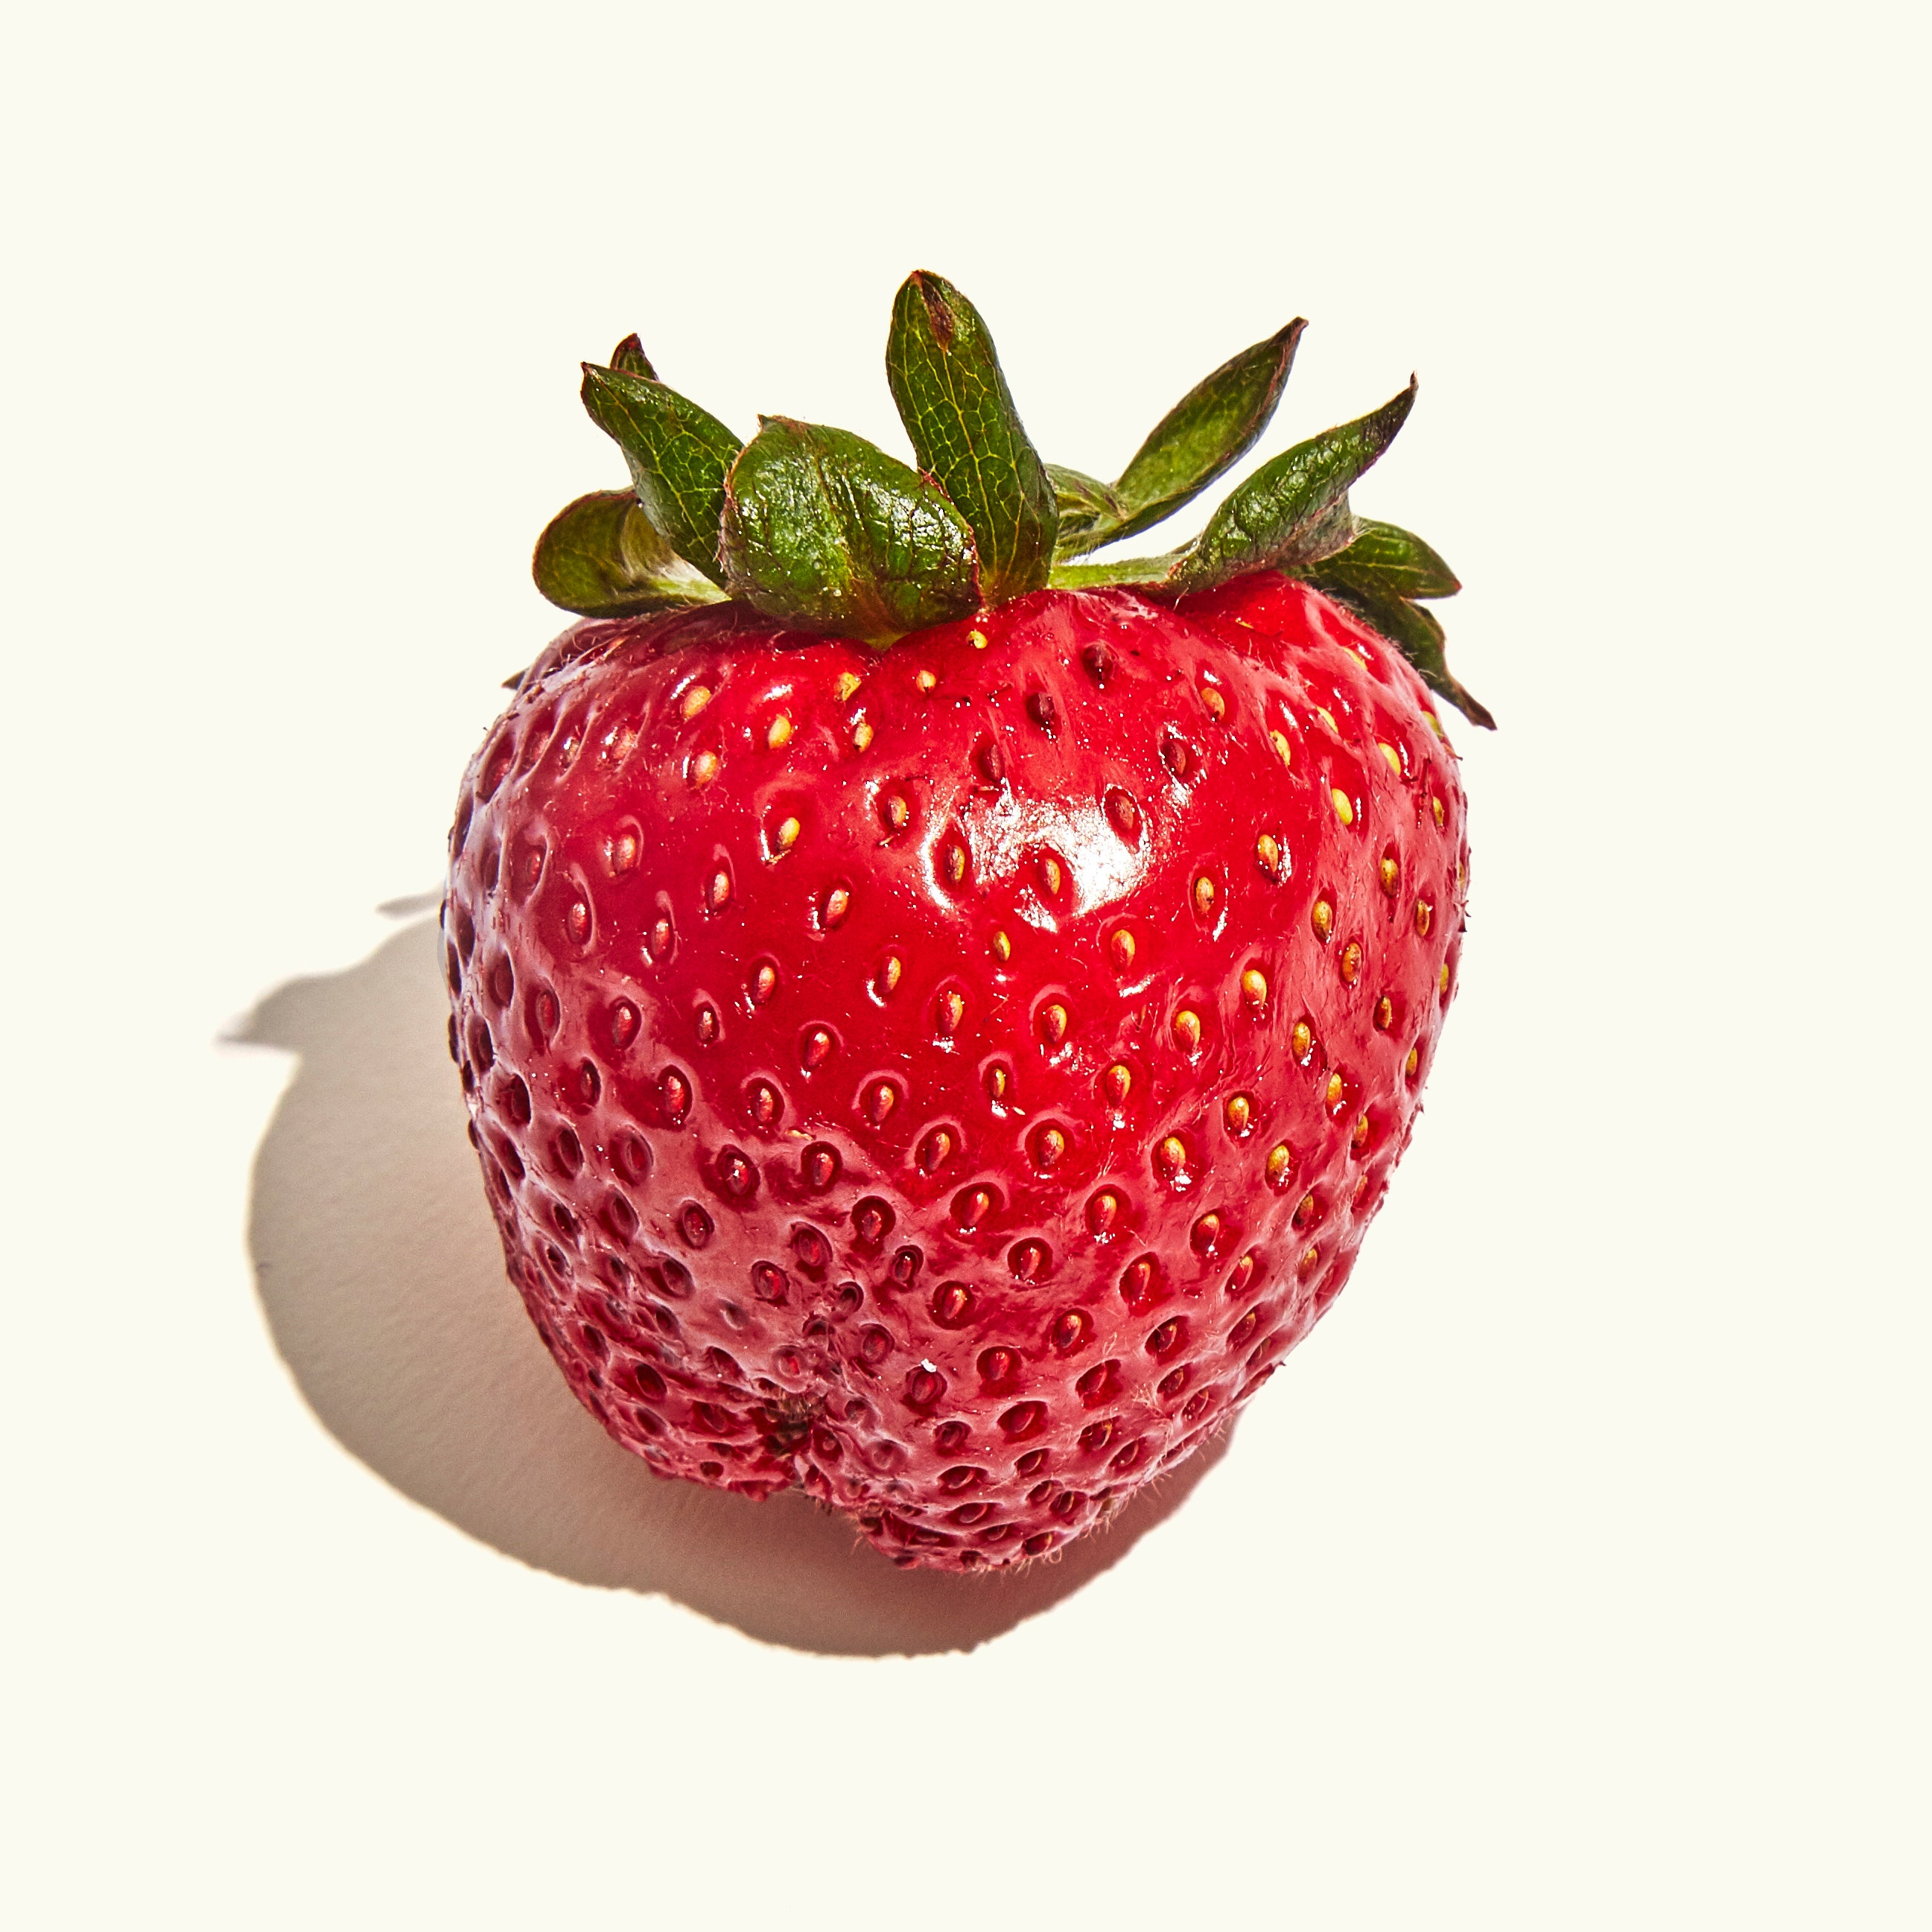

In [7]:
# from PIL import Image
# im = Image.open("data/mobilenet_samples/ex1.jpg")
# im.rotate(45).show()

from IPython.display import Image
Image("data/mobilenet_samples/ex1.jpg", width='300', height='200')

In [8]:
# Preproces the image with mobilenet.preprocess_input
preprocessed_image = prepare_image('ex1.jpg')
predictions = mobile.predict(preprocessed_image)

# the following function returns top 5 predictions for the image
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.9996215),
  ('n07747607', 'orange', 0.00019390126),
  ('n04476259', 'tray', 6.118056e-05),
  ('n12620546', 'hip', 1.8783045e-05),
  ('n07753275', 'pineapple', 1.497028e-05)]]

In [9]:
# lets safe the model for later use
mobile.save('models/mobilenet.h5')